In [13]:
#Step 1:
#import iris dataset and check for the datatype of variety attribute

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
df = pd.read_csv('iris.csv')
df.head(5)

print(df.variety.dtype)

object


In [14]:
#Step 2:
#Categorical data should be converted into numeric data



if df.variety.dtype == 'object':
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df.variety.values))
    df.variety = lbl.transform(list(df.variety.values))
    
print(df.variety.dtype)


int64


In [15]:
#Step 3:
#Classification of training and testing data

Y = df.variety.values
X = df.drop(['variety'],axis=1).values

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.20, random_state=27)


In [19]:
#Step 4:
#Use the naive bayes classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
NaiveBayesModel = gnb.fit(x_train, y_train)
y_pred = NaiveBayesModel.predict(x_test)
accuracy_score(y_test, y_pred)

0.9

In [20]:
#Step 5:
#Print the confusion matrix
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

[[ 7  0  0]
 [ 0 10  1]
 [ 0  2 10]]


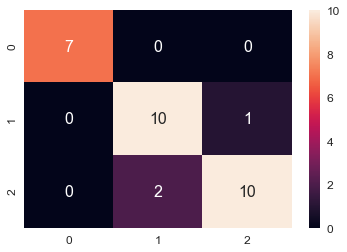

In [22]:
#Step 6:
#Using seaborn, visualize the given confusion matrix

import seaborn as sn

sn.set(font_scale=1.2)
sn.heatmap(pd.DataFrame(con_mat), annot=True,annot_kws={"size": 16})

In [23]:
#Step 7:
#Fitting the data into the SVM Classifier

from sklearn import svm

from sklearn.metrics import average_precision_score

x_train, x_test, y_train, y_test = train_test_split(X[Y<2],Y[Y<2], test_size= 0.95)

classifier = svm.LinearSVC(random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 1.00


In [25]:
#Add Noise data because, the precision-recall score is 100%

import numpy as np
# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 300 * n_features)]

x_train, x_test, y_train, y_test = train_test_split(X[Y<2],Y[Y<2], test_size= 0.20)

Average precision-recall score: 0.7762832405689548


Text(0,0.5,'Precision')

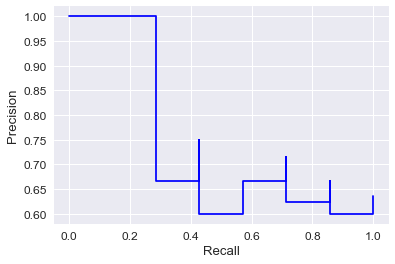

In [26]:
#Using linear kernel

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

classifier = svm.SVC(kernel='linear', random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')

Average precision-recall score: 0.6690785405071118


Text(0,0.5,'Precision')

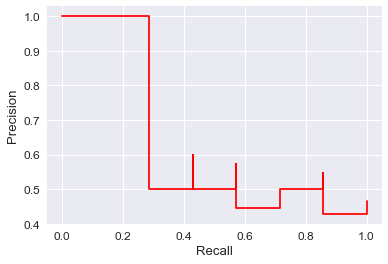

In [27]:
#Using polynomial kernel


classifier = svm.SVC(kernel='poly', random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')

Average precision-recall score: 0.7762832405689548


Text(0,0.5,'Precision')

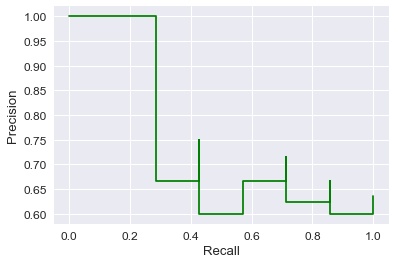

In [28]:
#Using RBF

classifier = svm.SVC(kernel='rbf', random_state=27)
classifier.fit(x_train, y_train)
y_score = classifier.decision_function(x_test)

print('Average precision-recall score:',average_precision_score(y_test, y_score))
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')